parsing log, completed traces ::   0%|          | 0/500 [00:00<?, ?it/s]

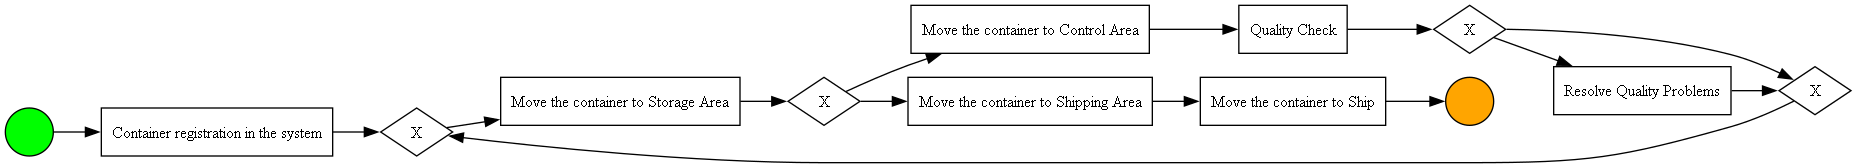

In [4]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py.objects.bpmn.exporter import exporter as bpmn_exporter

# Path to the XES file
xes_file_path = "SmartHarbor_process_log.xes"

# Import the event log
log = xes_importer.apply(xes_file_path)

# Discover the process model using the Inductive Miner algorithm
process_tree = pm4py.discover_process_tree_inductive(log)

# Convert the process tree to a BPMN model
bpmn_model = pt_converter.apply(process_tree, variant=pt_converter.Variants.TO_BPMN)

# Export the BPMN model to a file
bpmn_exporter.apply(bpmn_model, "SmartHarbor_process_model.bpmn")

# Visualize the BPMN model
gviz = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(gviz)